K means Clustering

hierarichal Clustering

DBSCAN Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0],[ 1,  2],[100,110],[1000,1200]])


In [3]:
kmeans = KMeans(n_clusters =4 )
kmeans.fit(X)
kmeans.labels_
#initially it create no of cluster is equal to no of points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 3, 3, 3, 0, 2, 1], dtype=int32)

In [4]:
data = pd.DataFrame(X)
labels = pd.DataFrame(kmeans.labels_)
data_with_label = pd.concat([data,labels],axis=1)

In [5]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 3], dtype=int32)

In [6]:
kmeans.cluster_centers_


array([[1.0e+00, 2.0e+00],
       [1.0e+03, 1.2e+03],
       [1.0e+02, 1.1e+02],
       [1.0e+01, 2.0e+00]])

Now test it with another dataset

In [7]:
X,y = make_blobs(n_samples=1000, centers=3,n_features=2,random_state=10)

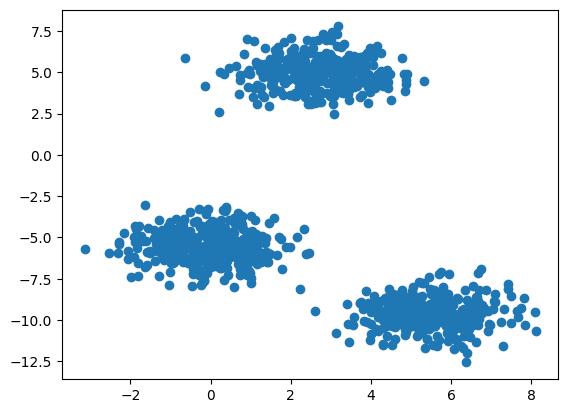

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=20)

In [10]:
wcss = []
for k in range(2,11):
  kmean = KMeans(n_clusters = k , init="k-means++")
  kmean.fit(X_train)
  wcss.append(kmean.inertia_)  #With in cluster sum of square value (Distance from the center)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [11]:
wcss

[6350.499237030179,
 1230.8405264123776,
 1086.0566002884955,
 938.7579371233035,
 812.9832114437013,
 699.1708935253637,
 611.0041560713178,
 528.5333819561765,
 486.88540803332126]

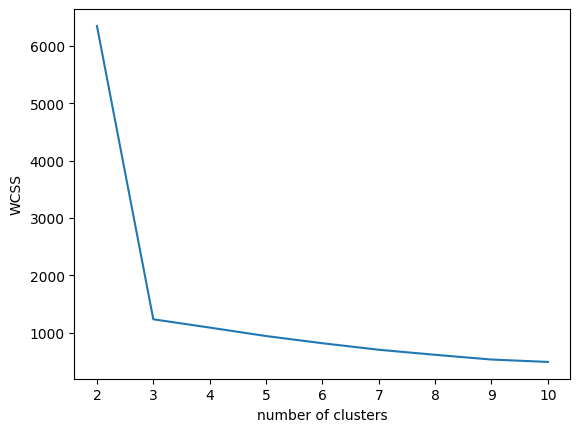

In [12]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
#humme saaf saaf dikh raha hai ki 3 ke bad graph ek dum se constant ho gaya hai , means this is our optimal value

In [14]:
kmean = KMeans(n_clusters = 3 , init="k-means++")
y_labels = kmean.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


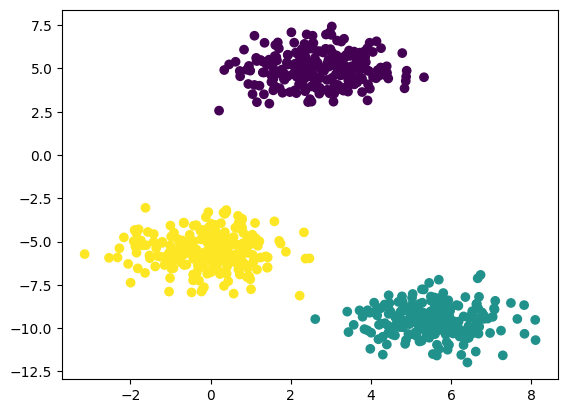

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [16]:
!pip install kneed

In [17]:
from kneed import KneeLocator

In [18]:
k = KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

In [19]:
k.elbow

3

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [22]:
silhouette_coeff=[]
for k in range(2,11):
  kmean = KMeans(n_clusters=k,init ="k-means++")
  kmean.fit(X_train)
  score = silhouette_score(X_train,kmean.labels_)
  silhouette_coeff.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
silhouette_coeff
#We can see it in range -1 to 1


[0.7273220153669463,
 0.7835543034796946,
 0.6287592671992658,
 0.4488990425650363,
 0.3123513896824496,
 0.3350677894573043,
 0.34236666149401723,
 0.34904677915201954,
 0.3431432077303477]

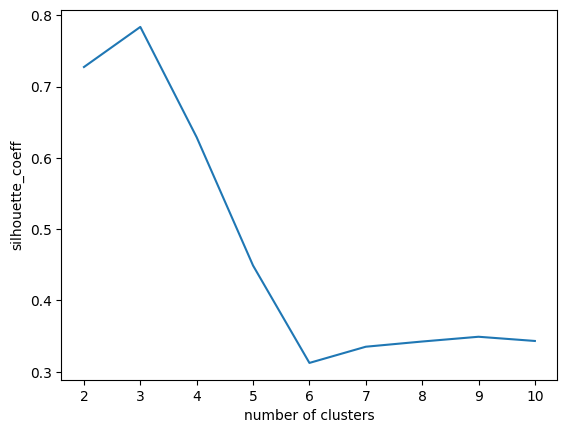

In [24]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("silhouette_coeff")
plt.show()

Task 1

you have a data set

 unsupervised+supervised-semisupervised

classification data(wafer data)

you have a multiple files
take all the files and create a single dataframe

then you have to perform clustering (kmean, hirarchical, dbscan)

after clustering the data will be segeregated in different clsuters

then you have to perform supervised mllearning(log reg, svc, DTC, RF, boosting classifier) on each and every  and find out the best algorithm